# Importing Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rn
import datetime
import os

from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten, Conv2D, Activation, BatchNormalization, Dense, Input, Dropout, GRU, LSTM, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Loading and Preprocessing Data

In [2]:
train_dir = 'dataset/train/'
test_dir = 'dataset/test/'

In [3]:
datagen = ImageDataGenerator(
    rescale=1./255,        
    shear_range=0.2,       
    zoom_range=0.2,        
    horizontal_flip=True,  
)

In [4]:
train = datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    seed=40,
    shuffle=True
)

Found 28709 images belonging to 7 classes.


In [5]:
type(train)

keras.src.legacy.preprocessing.image.DirectoryIterator

In [6]:
test = datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    seed=40,
    shuffle=True
)

Found 7178 images belonging to 7 classes.


# Base Model

## Model Building

In [7]:
model = Sequential()

model.add(Input(shape=(64, 64, 1)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))

I0000 00:00:1745200804.206381    4175 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2278 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 168,487 (658.15 KB)

 Trainable params: 168,487 (658.15 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.fit(
    train,
    epochs=50,
    verbose=1,
    validation_data=test
)

Epoch 1/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - categorical_accuracy: 0.2741 - loss: 1.7708 - val_categorical_accuracy: 0.3904 - val_loss: 1.5635
Epoch 2/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - categorical_accuracy: 0.4047 - loss: 1.5326 - val_categorical_accuracy: 0.4432 - val_loss: 1.4354
Epoch 3/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - categorical_accuracy: 0.4465 - loss: 1.4348 - val_categorical_accuracy: 0.4776 - val_loss: 1.3774
Epoch 4/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - categorical_accuracy: 0.4799 - loss: 1.3454 - val_categorical_accuracy: 0.4837 - val_loss: 1.3491
Epoch 5/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - categorical_accuracy: 0.4992 - loss: 1.3127 - val_categorical_accuracy: 0.5060 - val_loss: 1.2849
Epoch 6/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - categorical_accuracy: 0.5207 - loss: 1.2589 - val_categorical_accuracy: 0.5159 - val_loss: 1.2627
Epoch 7/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - categorical_accuracy

## Base Model Performance

In [ ]:
plt.figure(figsize=(20, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(model.history.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Model 1

Using the base model with the following Data Augmentation:

- `rotation_range = 20`
- `width_shift_range=0.2`
- `height_shift_range=0.2,`

In [7]:
datagen_1 = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

In [8]:
train_1 = datagen_1.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    seed=40,
    shuffle=True
)

Found 28709 images belonging to 7 classes.


In [9]:
test_1 = datagen_1.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    seed=40,
    shuffle=True
)

Found 7178 images belonging to 7 classes.


In [22]:
model = Sequential()

model.add(Input(shape=(64, 64, 1)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 168,487 (658.15 KB)

 Trainable params: 168,487 (658.15 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(
    train_1,
    epochs=50,
    verbose=1,
    validation_data=test_1
)

Epoch 1/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - categorical_accuracy: 0.2422 - loss: 2.1758 - val_categorical_accuracy: 0.2648 - val_loss: 1.7932
Epoch 2/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - categorical_accuracy: 0.2710 - loss: 1.7785 - val_categorical_accuracy: 0.2828 - val_loss: 1.7511
Epoch 3/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - categorical_accuracy: 0.2894 - loss: 1.7461 - val_categorical_accuracy: 0.3083 - val_loss: 1.7158
Epoch 4/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - categorical_accuracy: 0.3102 - loss: 1.7064 - val_categorical_accuracy: 0.3363 - val_loss: 1.6554
Epoch 5/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - categorical_accuracy: 0.3465 - loss: 1.6435 - val_categorical_accuracy: 0.3608 - val_loss: 1.6183
Epoch 6/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - categorical_accuracy: 0.3651 - loss: 1.5959 - val_categorical_accuracy: 0.4003 - val_loss: 1.5391
Epoch 7/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - categorical_accuracy

## Model 1 performance

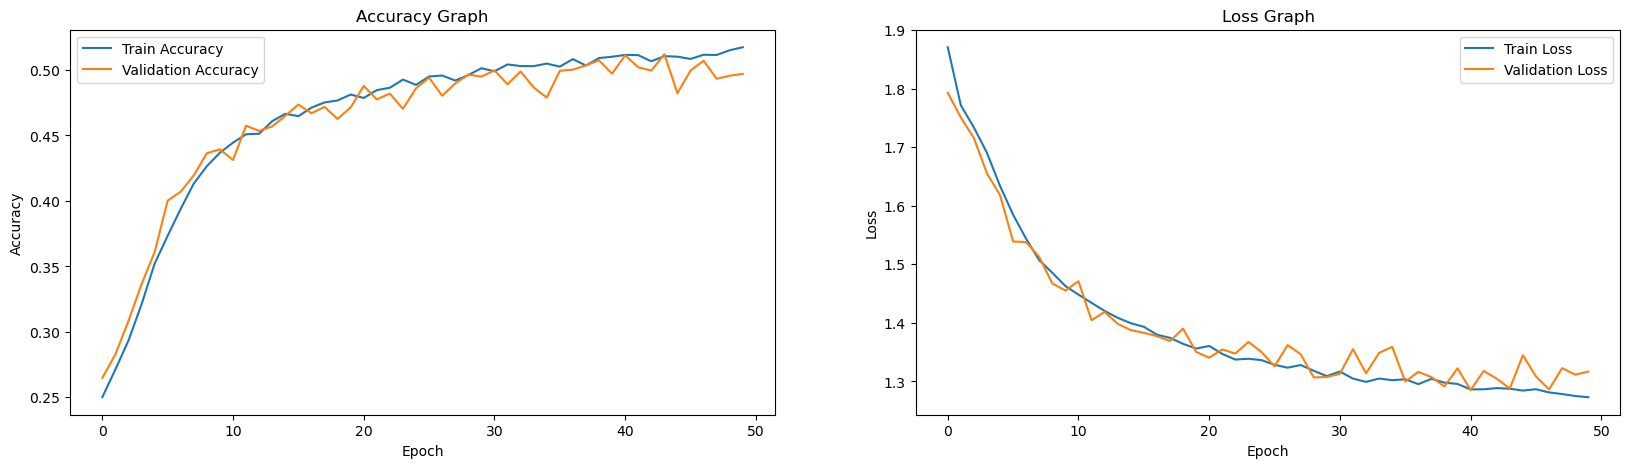

In [26]:
plt.figure(figsize=(20, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(model.history.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Model 1 Inference

Even thoough there hasn't been any improvements in the model's performance, the model's performance on train and test dataset is significantly closer, eliminating any chance of overfitting.

# Model 2

Introducing Batch Normalization on the augmented dataset

In [11]:
model_2 = Sequential()

model_2.add(Input(shape=(64, 64, 1)))

model_2.add(Conv2D(32, (3, 3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(32, (3, 3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(128, (3, 3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(7, activation='softmax'))

I0000 00:00:1745252686.606187    6747 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2278 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [12]:
model_2.compile(optimizer='adam', metrics=['categorical_accuracy'], loss='categorical_crossentropy')

In [13]:
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,511 (662.15 KB)

 Trainable params: 168,999 (660.15 KB)

 Non-trainable params: 512 (2.00 KB)

In [15]:
model_2.fit(
    train_1,
    epochs=50,
    verbose=1,
    validation_data=test_1
)

Epoch 1/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 45s 50ms/step - categorical_accuracy: 0.2556 - loss: 1.8207 - val_categorical_accuracy: 0.2228 - val_loss: 1.9134
Epoch 2/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - categorical_accuracy: 0.3448 - loss: 1.6407 - val_categorical_accuracy: 0.3656 - val_loss: 1.6072
Epoch 3/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - categorical_accuracy: 0.4040 - loss: 1.5271 - val_categorical_accuracy: 0.3338 - val_loss: 1.6992
Epoch 4/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - categorical_accuracy: 0.4332 - loss: 1.4614 - val_categorical_accuracy: 0.4521 - val_loss: 1.4473
Epoch 5/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - categorical_accuracy: 0.4639 - loss: 1.3929 - val_categorical_accuracy: 0.4292 - val_loss: 1.4678
Epoch 6/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - categorical_accuracy: 0.4734 - loss: 1.3680 - val_categorical_accuracy: 0.4263 - val_loss: 1.4785
Epoch 7/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - categorical_accuracy

## Model 2 Performance

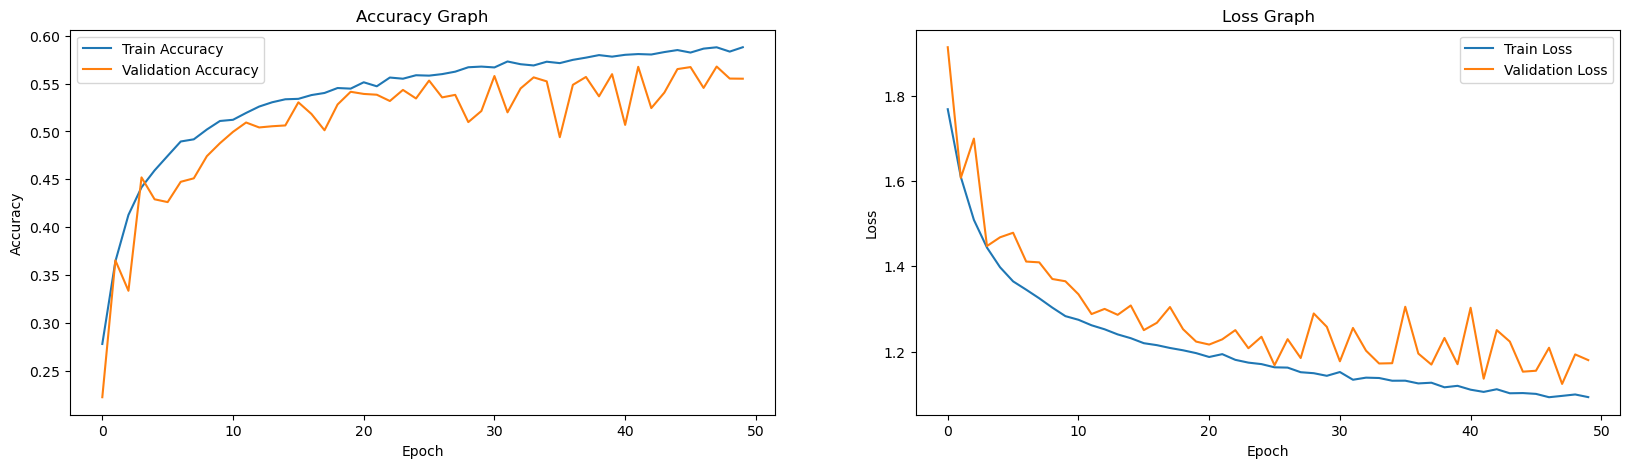

In [16]:
plt.figure(figsize=(20, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(model_2.history.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(model_2.history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(model_2.history.history['loss'], label='Train Loss')
plt.plot(model_2.history.history['val_loss'], label='Validation Loss')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Model 2 Inference

As is evident, not only did the 2nd model perform better than the first, the model's performance on train and test dataset were also closer than the 1st model.

# Model 3

Introducing Dropout on the augmented data

In [24]:
model_3 = Sequential()

model_3.add(Input(shape=(64, 64, 1)))

model_3.add(Conv2D(32, (3, 3), activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.2))

model_3.add(Conv2D(32, (3, 3), activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.2))

model_3.add(Conv2D(64, (3, 3), activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.2))

model_3.add(Conv2D(128, (3, 3), activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.2))

model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(7, activation='softmax'))

In [25]:
model_3.compile(optimizer='adam', metrics=['categorical_accuracy'], loss='categorical_crossentropy')

In [26]:
model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 29, 29, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,511 (662.15 KB)

 Trainable params: 168,999 (660.15 KB)

 Non-trainable params: 512 (2.00 KB)

In [15]:
model_3.fit(
    train_1,
    epochs=50,
    verbose=1,
    validation_data=test_1
)

Epoch 1/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 45s 51ms/step - categorical_accuracy: 0.2364 - loss: 1.8437 - val_categorical_accuracy: 0.2718 - val_loss: 1.7586
Epoch 2/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - categorical_accuracy: 0.2828 - loss: 1.7511 - val_categorical_accuracy: 0.2091 - val_loss: 2.0154
Epoch 3/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - categorical_accuracy: 0.3306 - loss: 1.6715 - val_categorical_accuracy: 0.3433 - val_loss: 1.6216
Epoch 4/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - categorical_accuracy: 0.3632 - loss: 1.6001 - val_categorical_accuracy: 0.4040 - val_loss: 1.5282
Epoch 5/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - categorical_accuracy: 0.3969 - loss: 1.5475 - val_categorical_accuracy: 0.3912 - val_loss: 1.5534
Epoch 6/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - categorical_accuracy: 0.4184 - loss: 1.5060 - val_categorical_accuracy: 0.4132 - val_loss: 1.5001
Epoch 7/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - categorical_accuracy

## Model 3 Performance

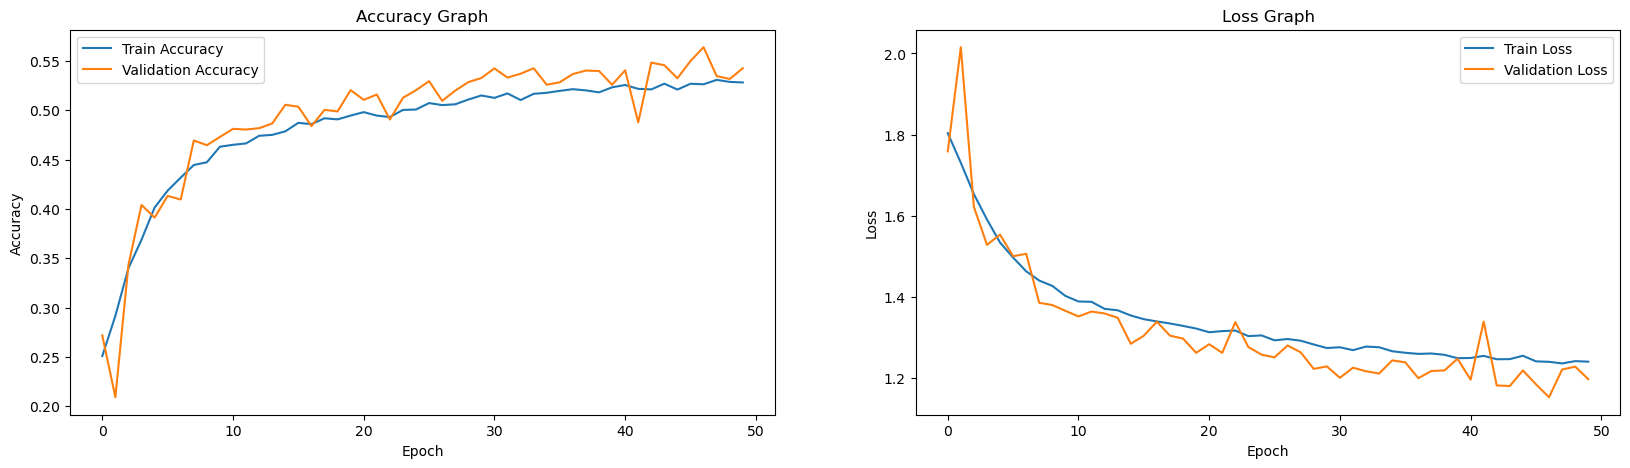

In [16]:
plt.figure(figsize=(20, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(model_3.history.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(model_3.history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(model_3.history.history['loss'], label='Train Loss')
plt.plot(model_3.history.history['val_loss'], label='Validation Loss')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Model 3 Inference

It seems for the 3rd model, we have somewhat hit a plateau even earlier. Compared to what seemed to be at epoch 10, in the 3rd model, we have started to hit a plateau at around 7th epoch.

# Model 4

Simplifying the model to check for improvements

In [15]:
model_4 = Sequential()

model_4.add(Input(shape=(64, 64, 1)))

model_4.add(Conv2D(32, (3, 3), activation='relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))
#model_4.add(Dropout(0.2))

model_4.add(Conv2D(128, (3, 3), activation='relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))
#model_4.add(Dropout(0.2))

model_4.add(Flatten())
model_4.add(Dense(128, activation='relu'))
model_4.add(Dense(7, activation='softmax'))

In [16]:
model_4.compile(optimizer='adam', metrics=['categorical_accuracy'], loss='categorical_crossentropy')

In [17]:
model_4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 29, 29, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,250,247 (12.40 MB)

 Trainable params: 3,249,927 (12.40 MB)

 Non-trainable params: 320 (1.25 KB)

In [18]:
model_4.fit(
    train_1,
    epochs=50,
    verbose=1,
    validation_data=test_1
)

Epoch 1/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - categorical_accuracy: 0.2351 - loss: 2.5394 - val_categorical_accuracy: 0.2601 - val_loss: 1.8302
Epoch 2/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - categorical_accuracy: 0.2695 - loss: 1.7643 - val_categorical_accuracy: 0.1995 - val_loss: 7.9980
Epoch 3/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - categorical_accuracy: 0.2851 - loss: 1.7290 - val_categorical_accuracy: 0.3023 - val_loss: 1.7228
Epoch 4/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - categorical_accuracy: 0.3086 - loss: 1.6926 - val_categorical_accuracy: 0.3119 - val_loss: 1.6895
Epoch 5/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - categorical_accuracy: 0.3244 - loss: 1.6736 - val_categorical_accuracy: 0.3094 - val_loss: 1.7647
Epoch 6/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - categorical_accuracy: 0.3350 - loss: 1.6494 - val_categorical_accuracy: 0.3338 - val_loss: 1.6759
Epoch 7/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - categorical_accuracy

## Model 4 Performance

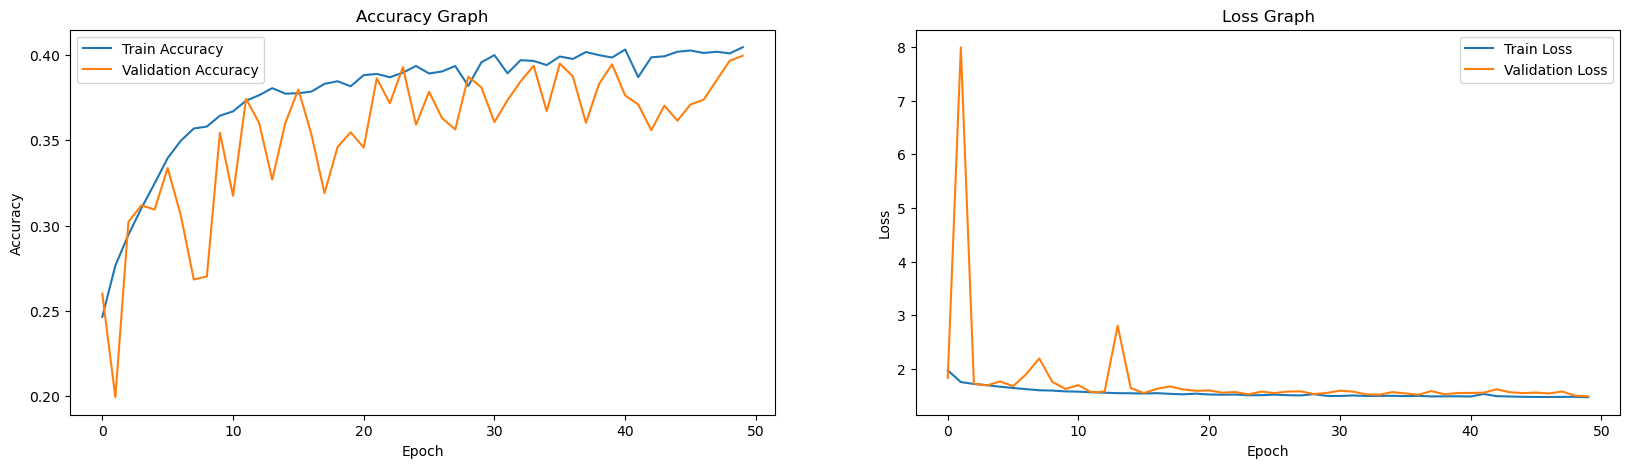

In [19]:
plt.figure(figsize=(20, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(model_4.history.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(model_4.history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(model_4.history.history['loss'], label='Train Loss')
plt.plot(model_4.history.history['val_loss'], label='Validation Loss')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Model 4 Inference

It seems a simpler model did not provide any useful improvements.

# Model 5

Introducing ReduceLROnPlateau on the augmented data with the `model_3` architecture

In [34]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.5,
    patience=3,
    min_lr=1e-16,
    verbose=1
)

In [39]:
model_3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [40]:
model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 29, 29, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,511 (662.15 KB)

 Trainable params: 168,999 (660.15 KB)

 Non-trainable params: 512 (2.00 KB)

In [41]:
model_3.fit(
    train_1,
    epochs=100,
    verbose=1,
    validation_data=test_1,
    callbacks=[reduce_lr]
)

Epoch 1/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.2541 - loss: 1.8053 - val_accuracy: 0.2471 - val_loss: 1.8133 - learning_rate: 0.0010
Epoch 2/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.2458 - loss: 1.8134 - val_accuracy: 0.2471 - val_loss: 1.8134 - learning_rate: 0.0010
Epoch 3/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.2537 - loss: 1.8121 - val_accuracy: 0.2471 - val_loss: 1.8132 - learning_rate: 0.0010
Epoch 4/100
897/898 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2541 - loss: 1.8076
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.2541 - loss: 1.8076 - val_accuracy: 0.2471 - val_loss: 1.8132 - learning_rate: 0.0010
Epoch 5/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.2498 - loss: 1.8108 - val_accuracy: 0.2471 - val_loss: 1.8131 - learning_rate: 5.0000e-04
Epoch 6/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.